# Exercise 4: Newton Fractals

We now consider the function $z \to z^3 - 1$ for $z \in U:=\{ a + bi | |a| \leq 1, |b| \leq 1 \}$. Newtons Method converges depending on the initial value $z_0$ to one of the three roots of the function. We want to give each solution a color. Now every initial value gets the color of the solution it converges to


Some Hints:

+ Use Module Image of PIL
+ Take a image of 512 x 512 pixels
+ Take the interval [-1,1] and [-i,i] with 512 points
+ These Points in the interval are starting points for Newtons method
+ Use Tolerance of 1e-3 and max 20 iterations
+ Give the Initial value the color of the solution it converges to if the distance of the solution and the initial value is smaller than the tolerance. If the distance is bigger to all solutions give the point the color white
+ Save the image

In [34]:
# Import the Modules
import numpy as np
from PIL import Image

Again consider Newtons Method

+ $x^0$ is the initial value
+ $x^{n+1} = x^n - \frac{f(x^n)}{f'(x^n)}$

In [35]:
# Define the function and the derivative

def f(z):
    return z**3 -1

def f_prime(z):
    return 3*z**2

In [36]:
# Implement Newtons method with the given tolerance
def newton_method(z0, tol=1e-3, max_iter=20):
    z = z0
    for i in range(max_iter):
        z_next = z - f(z) / f_prime(z)
        if abs(z_next - z) < tol:
            break
        z = z_next
    return z

We now consider the roots:

+ $z = 1$
+ $z = -\frac{1}{2} + i\frac{\sqrt{3}}{2}$
+ $z = -\frac{1}{2} - i\frac{\sqrt{3}}{2}$

And give the three roots the colors: Red, Green, Blue

In [37]:
roots = [1, -0.5 + 0.5j * np.sqrt(3), -0.5 - 0.5j * np.sqrt(3)]
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # Red, Green, Blue

In [38]:
width, height = 512, 512
image = Image.new("RGB", (width, height))
pixels = image.load()

In [39]:
# Now split interval s[-1,1] and [-i,i] to width and height parts

x = np.linspace(-1, 1, width)
y = np.linspace(-1j, 1j, height)

for i in range(width):
    for j in range(height):
        z = newton_method(x[i] + y[j] , tol=1e-3)
        # Calculate distance
        distances = np.abs(roots - z)
        # If all distances are bigger than 1e-3, then the point is not converging --> color white
        if np.all(distances > 1e-3):
            pixels[i, j] = (255, 255, 255)
            continue
        # Else color the pixel according to the root it converges to
        else:
            k = np.argmin(distances)
            pixels[i, j] = colors[k]
    


In [40]:
# Show the image
image.show()

# Exercise 5 Lambda Strategy

In this exercise we consider the lambda strategy. In the k-th iteration step

$\Delta x^{(k)} = - [f'(x^{k})]^{-1}f(x^{(k)})$ and $\lambda = 1

If $||f(x^{(k)} + \lambda \Delta x^{(k)})|| > ||f(x^{(k)})||$ we set $\lambda = \frac{\lambda}{2}$

The iteration is stopped if the inequality is not fullfilled or lambda is to small $\lambda < 10^{-7}$. In this case we print out a error message.

Otherwise we set $x^{(k+1)} = x^{(k)} + \lambda \Delta x^{(k)}$ 

In [41]:
def damped_newton_method(z0, tol=1e-3, max_iter=20, lambda_tol=1e-16):
    """"
    Performs the Lambda-Strategie

    Parameters:
    z0: complex
        The initial guess
    tol: float
        The tolerance
    max_iter: int
        The maximum number of iterations
    lambda_tol: float
        The tolerance for the lambda value
    """
    
    z = z0 # Initial guess
    for i in range(max_iter):
        delta_z = -f(z) / f_prime(z)
        lambda_ = 1
        while abs(f(z + lambda_ * delta_z)) > abs(f(z)):
            lambda_ /= 2
            if lambda_ < lambda_tol:
                raise ValueError("λ became too small, stopping iteration")
        z_next = z + lambda_ * delta_z
        if abs(z_next - z) < tol:
            break
        z = z_next
    return z

In [42]:



# Consider again the function f(z) = z^3 - 1

width, height = 512, 512
image = Image.new("RGB", (width, height))
pixels = image.load()

x = np.linspace(-1, 1, width)
y = np.linspace(-1j, 1j, height)

for i in range(width):
    for j in range(height):
        z = damped_newton_method(x[i] + y[j])
        # Calculate distance
        distances = np.abs(roots - z)
        # If all distances are bigger than 1e-3, then the point is not converging --> color white
        if np.all(distances >= 1e-3):
            pixels[i, j] = (255, 255, 255)
            continue
        # Else color the pixel according to the root it converges to
        else:
            k = np.argmin(distances)
            pixels[i, j] = colors[k]

# Show the image
image.show()


# Freudenstein und Roth Function

This nonlinear function is given by

$f(x) = f_1(x)^2 + f_2(x)^2$

with

$f_1(x) = -13 + x_1 + ((5 - x_2)x_2 - 2)x_2$

$f_2(x) = -29 + x_1 + ((1 + x_2)x_2 - 14)x_2$

The function has three stationary points. We want to find them with the lambda strategy. We start with the initial value.


So for this we have the Jacobian

$J(x) = \begin{pmatrix} \frac{\partial f_1}{\partial x_1} & \frac{\partial f_1}{\partial x_2} \\ \frac{\partial f_2}{\partial x_1} & \frac{\partial f_2}{\partial x_2} \end{pmatrix}$



+ $f_1(x) = -13 + x_1 + 5x_2^2 - x_2^3 - 2x_2$
+ $f_2(x) = -29 + x_1 + x_2^2 + x_2^3 - 14x_2$

now the partial derivatives of $f_1$ and $f_2$ are

+ $\frac{\partial f_1}{\partial x_1} = 1$
+ $\frac{\partial f_1}{\partial x_2} = 10x_2 - 3x_2^2 - 2$
+ $\frac{\partial f_2}{\partial x_1} = 1$
+ $\frac{\partial f_2}{\partial x_2} = 2x_2 + 3x_2^2 - 14$

## Compute the partial Derivative of the Freudenstein und Roth Function

$\frac{\partial f}{\partial x_1} = 2f_1(x) \frac{\partial f_1}{\partial x_1} + 2f_2(x) \frac{\partial f_2}{\partial x_1} = 2f_1(x) + 2f_2(x)$

$\frac{\partial f}{\partial x_2} = 2f_1(x) \frac{\partial f_1}{\partial x_2} + 2f_2(x) \frac{\partial f_2}{\partial x_2} = 2f_1(x)(10x_2 - 3x_2^2 - 2) + 2f_2(x)(2x_2 + 3x_2^2 - 14)$

In [43]:
def f_1(x1,x2):
    return -13 + x1 + ((5 - x2) * x2 - 2) * x2

def f_2(x1,x2):
    return -29 + x1 + ((x2 + 1) * x2 - 14) * x2

def freudenstein_and_roth(x1,x2):
    return f_1(x1,x2)**2 + f_2(x1,x2)**2

def Jacobian(x1,x2):
    J = np.zeros((2))
    J[0] = 2 * f_1(x1,x2) * 2*f_2(x1,x2)  
    J[1] = 2*f_1(x1,x2)*(10*x2 - 3*x2**2 - 2) + 2*f_2(x1,x2)*(2*x2 + 3*x2**2 - 14)
    return J


    

In [44]:
def freudenstein_roth_newton_method(x0, tol=1e-6, max_iter=100, lambda_tol=1e-7):
    """
    Function to solve Freudenstein and Roth with the Lambda-Strategie 

    Parameters:
    x0: list
        The initial guess [x1, x2]
    tol: float
        The tolerance
    max_iter: int
        The maximum number of iterations
    lambda_tol: float
        The tolerance for the lambda value
    """
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        J = Jacobian(x[0], x[1])
        f_val = freudenstein_and_roth(x[0], x[1])
        delta_x = -f_val / J
        lambda_ = 1
        while freudenstein_and_roth(x[0] + lambda_ * delta_x[0], x[1] + lambda_ * delta_x[1]) > f_val:
            lambda_ /= 2
            if lambda_ < lambda_tol:
               print("λ became too small, stopping iteration")
               break 

        x_next = x + lambda_ * delta_x
        if np.linalg.norm(x_next - x) < tol:
            break
        x = x_next
    return x

# Initial guess
x0 = [7, 4]

# Solve the function
solution = freudenstein_roth_newton_method(x0)
print("Solution:", solution)

λ became too small, stopping iteration
Solution: [4.13922269 4.00364658]


In [45]:
# Define a list of initial guesses
initial_guesses = [
  [7,5],
  [11,5],
  [11,-5],
  [25,0]
]

# Find the stationary points
stationary_points_lambda = []
for guess in initial_guesses:
    try:
        solution = freudenstein_roth_newton_method(guess)
        stationary_points_lambda.append(solution)
    except ValueError as e:
        print(f"Initial guess {guess} did not converge: {e}")

# Print the stationary points
print("Stationary points:")
for point in stationary_points_lambda:
    print(point)

λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopping iteration
λ became too small, stopp

In [46]:
# Hit em with the old BFGS
from scipy.optimize import minimize
import numpy as np

def f1(x):
    x1,x2 = x
    return -13 + x1 + ((5 - x2) * x2 - 2) * x2

def f2(x):
    x1,x2 = x
    return -29 + x1 + ((x2 + 1) * x2 - 14) * x2

def f(x):
    return f1(x)**2 + f2(x)**2

def gradient_f(x):
    x1,x2 = x
    df1_dx1 = 1
    df1_dx2 = -3*x2**2 + 10*x2 -2
    df2_dx1 = 1
    df2_dx2 = 3*x2**2 + 2*x2 - 14
    df_dx1 = 2*f1(x)*df1_dx1 + 2*f2(x)*df2_dx1
    df_dx2 = 2*f1(x)*df1_dx2 + 2*f2(x)*df2_dx2
    return np.array([df_dx1, df_dx2])

initial_guesses = [
    [-50,7],
    [20,7],
    [20,-18],
    [5,-10]
    ]

stationary_points_bfg5 = []

for guess in initial_guesses:
    res = minimize(f, guess, jac=gradient_f, method='BFGS')
    stationary_points_bfg5.append(res.x)


for i, point in enumerate(stationary_points_bfg5):
    print(f"Stationary point {i+1}: {point}")

Stationary point 1: [4.99999999 4.        ]
Stationary point 2: [5. 4.]
Stationary point 3: [11.41277904 -0.89680525]
Stationary point 4: [11.41277924 -0.89680524]


# Online Help

So i looked online and if one can make a contour plot we can visualize the stationary points of the function

The three stationary points are

+ $(x_1,x_2) = (5,4)$
+ $(x_1,x_2) = (15 + \frac{8}{3}(1+\sqrt(11/2)), \frac{2}{3}(1+\sqrt(11/2)))$
+ $(x_1,x_2) = (15 + \frac{8}{3}(1-\sqrt(11/2)), \frac{2}{3}(1-\sqrt(11/2)))$

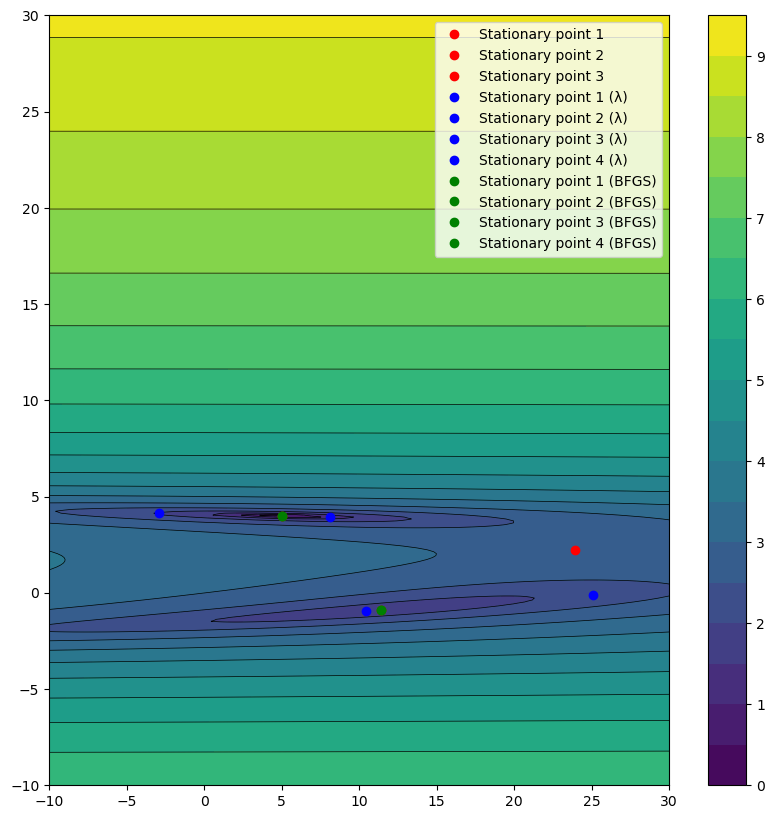

In [47]:
import matplotlib.pyplot as plt

x1 = np.linspace(-10,30,400)
x2 = np.linspace(-10,30,400)
X1, X2 = np.meshgrid(x1,x2)
Z = np.log10(np.array([f([x1,x2]) for x1,x2 in zip(X1.ravel(),X2.ravel())]).reshape(X1.shape))

plt.figure(figsize=(10,10))
cp = plt.contourf(X1, X2, Z, levels=20,cmap='viridis')
plt.colorbar(cp)
plt.contour(X1, X2, Z, levels=20, colors='black', linewidths=0.5)

# Plot the stationary points

stationary_points = [
    (5, 4),
    (15 + (8/3)*(1 + np.sqrt(11/2)), (2/3)*(1 + np.sqrt(11/2))),
    (15 + (8/3)*(1 - np.sqrt(11/2)), (2/3)*(1 - np.sqrt(11/2)))
]

for i, point in enumerate(stationary_points):
    plt.plot(*point, 'ro', label=f"Stationary point {i+1}")

# Plot the points obtained with the Lambda-Strategie

for i, point in enumerate(stationary_points_lambda):
    plt.plot(*point, 'bo', label=f"Stationary point {i+1} (λ)") 

# Plot the points obtained with BFGS

for i, point in enumerate(stationary_points_bfg5):
    plt.plot(*point, 'go', label=f"Stationary point {i+1} (BFGS)")          

plt.legend()



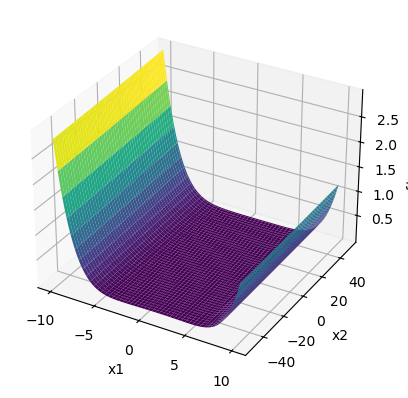

In [48]:
# Plot the freudenstein and roth function
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x1 = np.linspace(-10, 10, 100)

x2 = np.linspace(-50, 50, 100)

X1, X2 = np.meshgrid(x1, x2)

Z = freudenstein_and_roth(X2, X1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')

plt.show()



In [49]:
def newton_method_freudenstein_roth(x0, tol=1e-6, max_iter=1000):
    """
    Function to solve Freudenstein and Roth using normal Newton's method

    Parameters:
    x0: list
        The initial guess [x1, x2]
    tol: float
        The tolerance
    max_iter: int
        The maximum number of iterations
    """
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        J = Jacobian(x[0], x[1])
        f_val = freudenstein_and_roth(x[0], x[1])
        delta_x = -f_val / J
        x_next = x + delta_x
        if np.linalg.norm(x_next - x) < tol:
            break
        x = x_next
    return x

# Define a list of initial guesses
initial_guesses = [
   [-50,7],
   [20,7],
   [20,-18],
   [5,-10]
]

# Find the stationary points
stationary_points = []
for guess in initial_guesses:
    try:
        solution = newton_method_freudenstein_roth(guess)
        stationary_points.append(solution)
    except ValueError as e:
        print(f"Initial guess {guess} did not converge: {e}")

# Print the stationary points
print("Stationary points:")
for point in stationary_points:
    print(point)


Stationary points:
[647.94068352 -23.28891476]
[-842.29022502   10.72967352]
[10.79637875  4.07291637]
[-1572.08348507    34.42073409]
